<a href="https://colab.research.google.com/github/kaurroopak/UCS420/blob/main/Lab_Assignment_7_(CC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab Assignment 7
### Submitted by - Roopakjeet Kaur (102497013)

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, and generate visual insights to help the business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
+ Well-documented code and clear comments.
+ Markdown explanaƟons for each step.
+ Screenshots of the plots and outputs.


Part I: Randomized Sales Data Generation (NumPy)
1. Initialize Random Seed
2. Generate Sales Data
+ Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
+ Electronics, Clothing, Home & Kitchen, Sports.
+ Sales values should be between 1000 and 5000 units per month.
+ The range should be randomized using the seed.
3. Convert to DataFrame
+ Convert the cleaned NumPy array into a Pandas DataFrame with:

  i. Columns: Electronics, Clothing, Home & Kitchen, Sports

  ii. Index: Months from Jan to Dec


Part II: Data Manipulation and Analysis (Pandas)
1. Display the first 5 rows and summary statistics of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecutive months for each category.
4. Add the following columns to the DataFrame:
+ Total Sales: Sum of all categories per month.
+ Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
+ If your roll number is even, apply a 10% discount to the Electronics category.
+ If odd, apply a 15% discount to the Clothing category.



Part III: Visualizations (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
+ Box plots to show the sales distribution for each category.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Part I
# 1.
roll_no = 102497013
np.random.seed(roll_no)

# 2.
sales_data = np.random.randint(1000, 5000, size=(12, 4))

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

# 3.
df = pd.DataFrame(sales_data, columns=categories, index=months)


In [ ]:
# Part II
# 1.
print("First 5 rows: \n", df.head())
print("\n\nSummary statistics:\n", df.describe())

# 2.
df['Total Sales'] = df.sum(axis=1)
total_sales_per_category = df[categories].sum()
print("\n\nTotal sales per category =\n",total_sales_per_category)
total_sales_per_month = df['Total Sales'].sum()
print("\nTotal sales per month = ", total_sales_per_month)

# 3.
sales_growth = df[categories].pct_change() * 100
avg_sales_growth = sales_growth.mean()
print("\nAverage sales growth between consecutive months for each category =\n",avg_sales_growth)

# 4.
df['Growth Rate'] = df['Total Sales'].pct_change() * 100
df['Growth Rate'] = df['Growth Rate'].fillna(0)
print("\n\nFirst 5 rows after adding 'Total Sales' and 'Growth Rate': \n", df.head())

# 5.
if roll_no % 2 == 0:
    df['Electronics'] = df['Electronics'] * 0.90
else:
    df['Clothing'] = df['Clothing'] * 0.85

df_after_discount = df.head()
print("\n\nFirst 5 rows after applying discount: \n", df_after_discount.head())


First 5 rows: 
      Electronics     Clothing  Home & Kitchen  Sports   Total Sales  \
Jan         4985   617.194090            3912    4338  71333.706069   
Feb         2834  1557.849352            1686    3766  54366.388135   
Mar         3770   890.516562            2616    4435  61590.506105   
Apr         3170   798.225857            3193    4816  62572.155795   
May         3849  1032.502262            3145    1302  50034.273494   

     Growth Rate  
Jan     0.000000  
Feb   -23.785835  
Mar    13.287839  
Apr     1.593833  
May   -20.037479  


Summary statistics:
        Electronics     Clothing  Home & Kitchen       Sports   Total Sales  \
count    12.000000    12.000000       12.000000    12.000000     12.000000   
mean   3194.833333  1117.841584     3023.333333  3120.833333  56041.941046   
std    1040.742902   453.152959      918.051923  1099.378158  11752.919461   
min    1316.000000   496.506245     1015.000000  1302.000000  30135.699022   
25%    2711.250000   819.52371

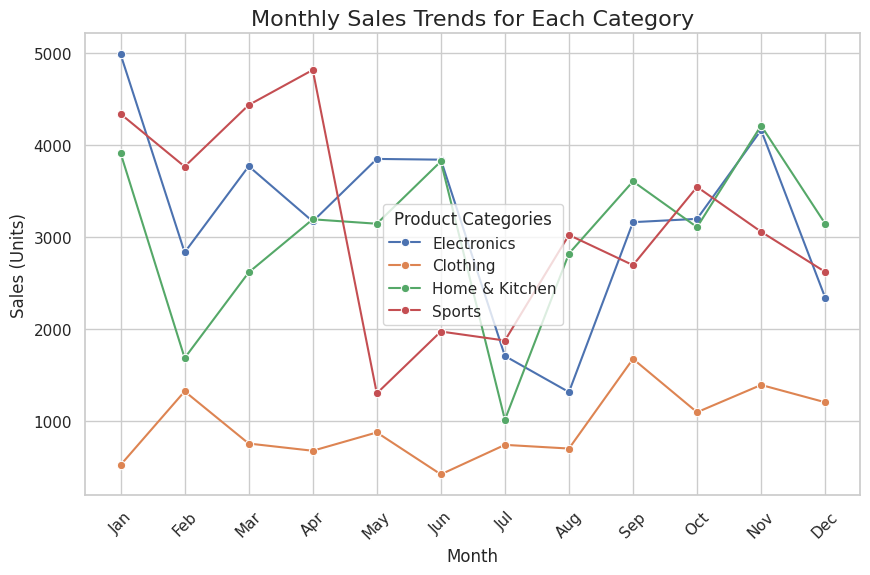

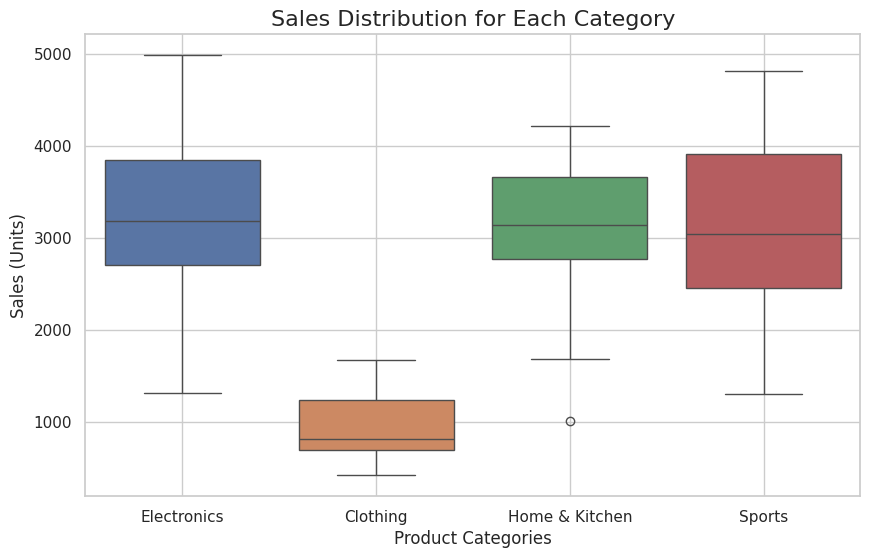

In [ ]:
# Part III
sns.set(style="whitegrid")

# 1.
plt.figure(figsize=(10, 6))
for category in categories:
    sns.lineplot(x=df.index, y=df[category], label=category, marker='o')

plt.title('Monthly Sales Trends for Each Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Categories')
plt.grid(True)
plt.show()

# 2.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[categories])
plt.title('Sales Distribution for Each Category', fontsize=16)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Sales (Units)', fontsize=12)
plt.grid(True)
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])

i. Find element-wise absolute value

ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each row.

iii. Mean, Median and Standard Deviation of flattened array, of each column, and each row

In [10]:
import numpy as np

array = np.array([[1, -2, 3], [-4, 5, -6]])

# i.
abs_array = np.abs(array)
print("Element-wise absolute value:\n", abs_array)

# ii.
flattened_array = array.flatten()
print("\nPercentiles of flattened array:")
print("25th: ", np.percentile(flattened_array, 25))
print("50th: ", np.percentile(flattened_array, 50))
print("75th: ", np.percentile(flattened_array, 75))

print("\nPercentiles for each column:")
print("25th, 50th, 75th percentiles for columns:\n", np.percentile(array, [25, 50, 75], axis=0))

print("\nPercentiles for each row:")
print(f"25th, 50th, 75th percentiles for rows:\n", np.percentile(array, [25, 50, 75], axis=1))

# iii.
print("\nMean, Median, and Standard Deviation for flattened array:")
print(f"Mean: {np.mean(flattened_array)}, Median: {np.median(flattened_array)}, Std: {np.std(flattened_array)}")

print("\nMean, Median, and Standard Deviation for each column:")
print(f"Means: {np.mean(array, axis=0)}, Medians: {np.median(array, axis=0)}, Stds: {np.std(array, axis=0)}")

print("\nMean, Median, and Standard Deviation for each row:")
print(f"Means: {np.mean(array, axis=1)}, Medians: {np.median(array, axis=1)}, Stds: {np.std(array, axis=1)}")


Element-wise absolute value:
 [[1 2 3]
 [4 5 6]]

Percentiles of flattened array:
25th:  -3.5
50th:  -0.5
75th:  2.5

Percentiles for each column:
25th, 50th, 75th percentiles for columns:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]

Percentiles for each row:
25th, 50th, 75th percentiles for rows:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]

Mean, Median, and Standard Deviation for flattened array:
Mean: -0.5, Median: -0.5, Std: 3.8622100754188224

Mean, Median, and Standard Deviation for each column:
Means: [-1.5  1.5 -1.5], Medians: [-1.5  1.5 -1.5], Stds: [2.5 3.5 4.5]

Mean, Median, and Standard Deviation for each row:
Means: [ 0.66666667 -1.66666667], Medians: [ 1. -4.], Stds: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).

i. Find floor, ceiling and truncated value, rounded values

In [11]:
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
print("Original Array:", a)

print("\nFloor values:", np.floor(a))
print("Ceiling values:", np.ceil(a))
print("Truncated values:", np.trunc(a))
print("Rounded values:", np.round(a))


Original Array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]

Floor values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [12]:
def swap_elements(lst, index1, index2):
    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp

my_list = [10, 20, 30, 40, 50]
print("Original List:", my_list)

# Swap elements at index 1 and 3
swap_elements(my_list, 1, 3)

print("List after swapping:", my_list)


Original List: [10, 20, 30, 40, 50]
List after swapping: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converting it to a list first.

In [13]:
def swap_elements_in_set(s, index1, index2):
    lst = list(s)
    lst[index1], lst[index2] = lst[index2], lst[index1]
    s = set(lst)
    return s

my_set = {10, 20, 30, 40, 50}
print("Original Set:", my_set)

# Swap elements at index 1 and 3
my_set = swap_elements_in_set(my_set, 1, 3)

print("Set after swapping:", my_set)


Original Set: {50, 20, 40, 10, 30}
Set after swapping: {40, 10, 50, 20, 30}
